In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:

ad = pd.read_csv('./Multiple-Linear-Regression/Datav1.0.csv')
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


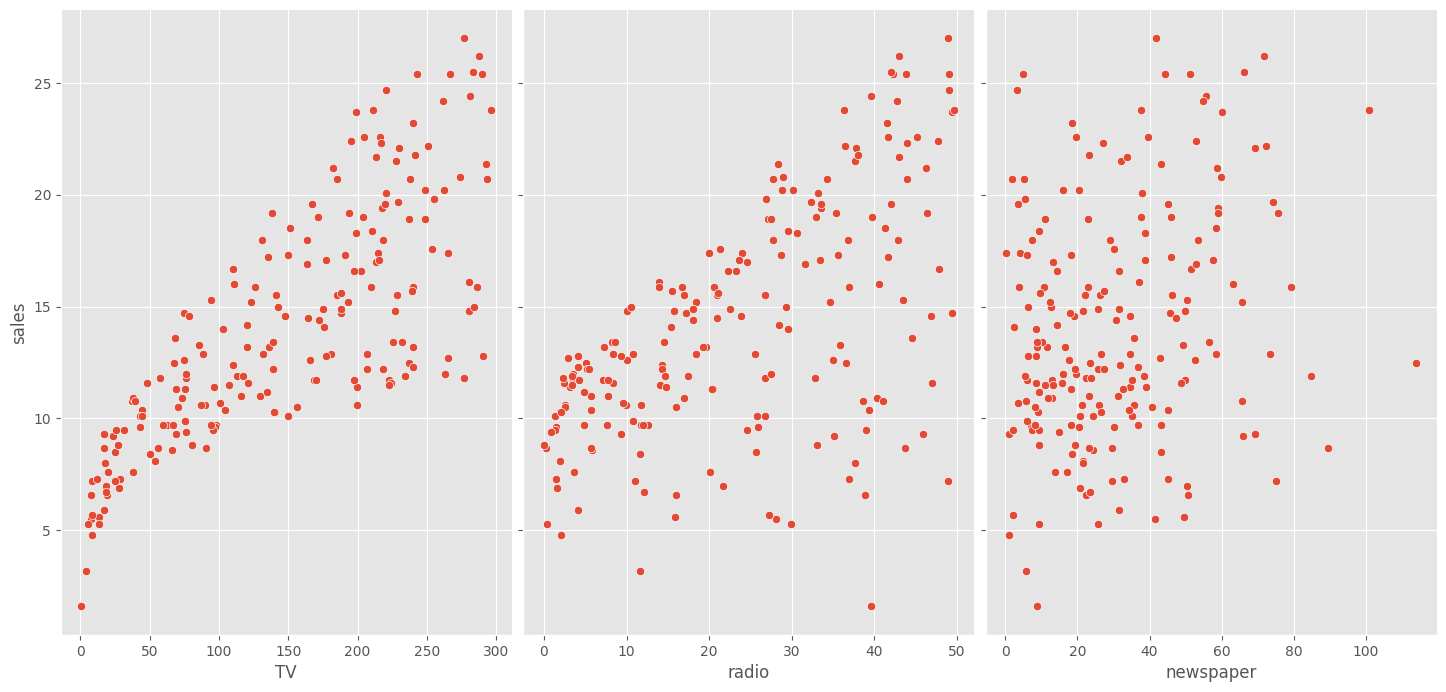

In [3]:
sns.pairplot(ad,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

In [4]:
from sklearn.linear_model import LinearRegression
X= ad[['TV','radio','newspaper']]
y=ad.sales
l = LinearRegression()
l.fit(X,y)
print(l.intercept_)
print(l.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [5]:
list(zip(['TV','radio','newspaper'], l.coef_))

[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820442),
 ('newspaper', -0.0010374930424763007)]

<Axes: >

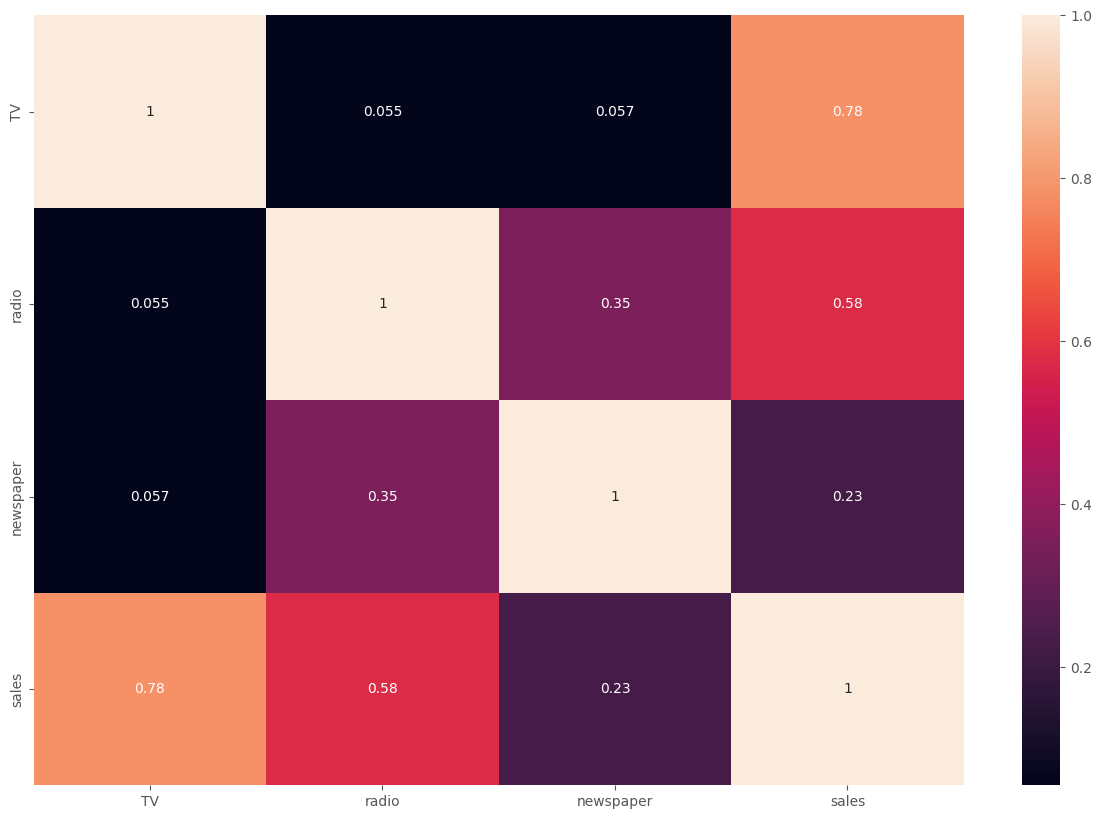

In [6]:
sns.heatmap(ad.corr(),annot=True)

In [7]:
from sklearn.metrics import r2_score
l2=LinearRegression().fit(X[['TV','radio']],y)
l2_preds = l2.predict(X[['TV','radio']])
print('R^2 score',r2_score(y,l2_preds))

R^2 score 0.8971942610828956


In [8]:
l3=LinearRegression().fit(X[['TV','radio','newspaper']],y)
l3_preds = l3.predict(X[['TV','radio','newspaper']])
print('R^2 score',r2_score(y,l3_preds))

R^2 score 0.8972106381789522


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X= ad[['TV','radio','newspaper']]
y= ad.sales
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
l4 =LinearRegression().fit(X_train,y_train)
l4_preds = l4.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,l4_preds)))
print("R^2:", r2_score(y_test,l4_preds))

RMSE 1.4046514230328953
R^2: 0.9156213613792232


In [10]:
X= ad[['TV','radio']]
y= ad.sales
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)
l5 =LinearRegression().fit(X_train,y_train)
l5_preds = l5.predict(X_test)
print("RMSE",np.sqrt(mean_squared_error(y_test,l5_preds)))
print("R^2:", r2_score(y_test,l5_preds))

RMSE 1.3879034699382888
R^2: 0.9176214942248908


c:\App\python\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


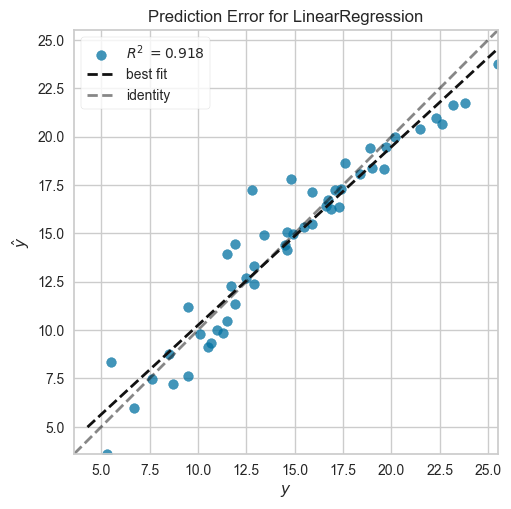

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [12]:
from yellowbrick.regressor import PredictionError,ResidualsPlot
v = PredictionError(l5).fit(X_train,y_train)
v.score(X_test,y_test)
v.poof()

In [63]:
for continent, forecast in forecasts.items():
    prediction=pd.DataFrame({'Continent':[continent,continent],'Year':[continent_data.loc[len(continent_data)-1,'Year'],str(int(continent_data.loc[len(continent_data)-1,'Year']))+1],'GNI':[continent_data.loc[len(continent_data)-1,'GNI'],forecast]})
    print(f"Forecasted GNI for {continent} in the next year:", forecast)

for continent in tidy['Continent'].unique():
    continent_data = tidy[tidy['Continent'] == continent]
    continent_data=continent_data.reset_index(drop=True)
    fig.add_trace(go.Scatter(x=continent_data['Year'], y=continent_data['GNI'], mode='lines', name=continent))
    fig.add_trace(go.Scatter(x=prediction['Year'], y=prediction['GNI'], mode='lines', name=f"Forecasted GNI ({continent})"))

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"